Nos últimos anos, especialmente a partir de 2020, o setor de tecnologia tem vivenciado uma aceleração sem precedentes no desenvolvimento e na adoção de soluções baseadas em Inteligência Artificial (IA). Nesse cenário, a NVIDIA se consolidou como uma das empresas mais relevantes do mercado, fornecendo hardware essencial (como GPUs) para o treinamento e a execução de modelos de IA.


## 📊 Descrição do Conjunto de Dados

O conjunto de dados utilizado neste trabalho contém o histórico de preços das ações da empresa NVIDIA, uma das principais companhias de tecnologia e semicondutores do mundo, com forte atuação na área de inteligência artificial e computação gráfica.

### 📁 Campos principais:
- `Date`: Data da cotação
- `Open`: Preço de abertura
- `High`: Preço mais alto do dia
- `Low`: Preço mais baixo do dia
- `Close`: Preço de fechamento
- `Adj Close`: Preço ajustado
- `Volume`: Volume negociado

O universo de aplicação está centrado no **mercado financeiro internacional**, com foco específico na volatilidade das ações da NVIDIA nos últimos anos.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import seaborn as sns ##Importação para aumentar as capacidades de plot
sns.set_theme() ##Colocando o tema padrão do Seaborn
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

df = pd.read_csv(filepath_or_buffer='./Nvidia_stock_data.csv')

Este arquivo contém dados históricos diários do mercado de ações da NVIDIA Corporation. Ele registra o desempenho e a atividade de negociação das ações da NVIDIA, fornecendo informações abrangentes adequadas para fins de análise, modelagem e educacionais.


Abaixo estão as descrições de cada coluna do arquivo:

Data: A data específica do calendário para a sessão de negociação, formatada como AAAA-MM-DD.

Fechamento: O preço pelo qual as ações da NVIDIA fecharam no final do dia de negociação.

Máxima: O preço mais alto atingido pelas ações da NVIDIA durante a sessão de negociação.

Mínima: O preço mais baixo registrado para as ações da NVIDIA durante a sessão de negociação.

Abertura: O preço pelo qual as ações da NVIDIA abriram no início do dia de negociação.

Volume: O número total de ações da NVIDIA negociadas naquele dia específico.

In [4]:
print(df) #Não excluir

            Date       Close        High         Low        Open      Volume
0     1999-01-22    0.037612    0.044775    0.035581    0.040119  2714688000
1     1999-01-25    0.041552    0.042029    0.037612    0.040597   510480000
2     1999-01-26    0.038328    0.042865    0.037731    0.042029   343200000
3     1999-01-27    0.038209    0.039403    0.036298    0.038447   244368000
4     1999-01-28    0.038089    0.038447    0.037850    0.038209   227520000
...          ...         ...         ...         ...         ...         ...
6632  2025-06-04  141.919998  142.389999  139.539993  142.190002   167120800
6633  2025-06-05  139.990005  144.000000  138.830002  142.169998   231397900
6634  2025-06-06  141.720001  143.270004  141.509995  142.509995   153986200
6635  2025-06-09  142.630005  145.000000  141.940002  143.190002   185114500
6636  2025-06-10  143.960007  144.289993  141.529999  142.690002   155372400

[6637 rows x 6 columns]


Tese 1:
📈 "A volatilidade (desvio padrão dos preços) aumentou significativamente após 2020."
Estatísticas: desvio padrão diário do preço de fechamento por ano.

In [5]:
df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037612,0.044775,0.035581,0.040119,2714688000
1,1999-01-25,0.041552,0.042029,0.037612,0.040597,510480000
2,1999-01-26,0.038328,0.042865,0.037731,0.042029,343200000
3,1999-01-27,0.038209,0.039403,0.036298,0.038447,244368000
4,1999-01-28,0.038089,0.038447,0.037850,0.038209,227520000


Análises descritivas dos dados

In [6]:
df.describe()

,Close,High,Low,Open,Volume
count,6637.000000,6637.000000,6637.000000,6637.000000,6.637000e+03
mean,10.091263,10.279293,9.885371,10.091765,5.952182e+08
std,26.686641,27.192558,26.140134,26.706411,4.297521e+08
min,0.031283,0.032597,0.030566,0.032000,1.968000e+07
25%,0.259741,0.266981,0.251946,0.259053,3.333360e+08
50%,0.440848,0.447144,0.434353,0.440676,4.961320e+08
75%,4.888134,4.957336,4.810735,4.895365,7.269720e+08
max,149.416245,153.115916,147.806407,153.015919,9.230856e+09


📊 Estatísticas descritivas por período (antes e depois de 2020)


In [8]:
# Criar coluna de volatilidade diária
df['Daily_Amplitude'] = df['High'] - df['Low']

# Criar coluna de período categórico
df['Period'] = np.where(df['Date'].dt.year < 2020, 'Antes_2020', '2020_em_diante')

# Estatísticas descritivas da volatilidade
df.groupby('Period')['Daily_Amplitude'].describe()

AttributeError: Can only use .dt accessor with datetimelike values

📈 Gráficos para visualização da volatilidade

In [2]:
# Boxplot comparando a amplitude diária antes e depois de 2020
plt.figure(figsize=(10,6))
sns.boxplot(x='Period', y='Daily_Amplitude', data=df)
plt.title('Distribuição da Volatilidade Diária da Ação da NVIDIA')
plt.xlabel('Período')
plt.ylabel('Amplitude Diária (High - Low)')
plt.show()

# Histograma das amplitudes diárias por período
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Daily_Amplitude', hue='Period', kde=True, bins=50)
plt.title('Histograma da Volatilidade Diária por Período')
plt.xlabel('Amplitude Diária')
plt.ylabel('Frequência')
plt.show()

ValueError: Could not interpret value `Period` for `x`. An entry with this name does not appear in `data`.

<Figure size 720x432 with 0 Axes>

📐 4. Skewness e Kurtosis

In [12]:
# Separar os dois períodos
antes_2020 = df[df['Period'] == 'Antes_2020']['Daily_Amplitude'].dropna()
apos_2020 = df[df['Period'] == '2020_em_diante']['Daily_Amplitude'].dropna()

# Skewness
print("Skewness Antes de 2020:", stats.skew(antes_2020))
print("Skewness Após 2020:", stats.skew(apos_2020))

# Kurtosis
print("Kurtosis Antes de 2020:", stats.kurtosis(antes_2020))
print("Kurtosis Após 2020:", stats.kurtosis(apos_2020))

KeyError: 'Period'

✅ Gráfico 1: Distribuição + Skewness

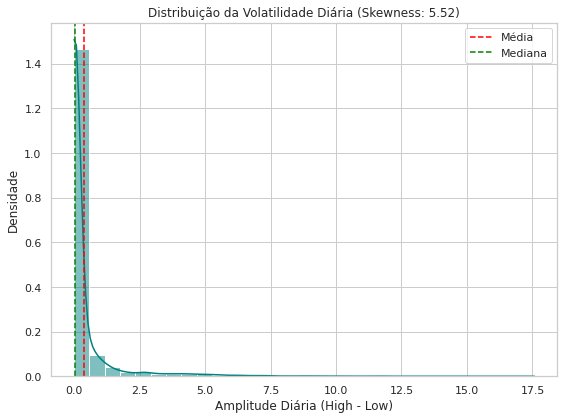

In [10]:
# Remover valores ausentes
nvidia_vol = df['Daily_Amplitude'].dropna()

# Calcular skewness
skew_nvidia = nvidia_vol.skew()

# Plotar histograma com KDE para Skewness
plt.figure(figsize=(8, 6))
sns.histplot(nvidia_vol, bins=30, kde=True, color='teal', stat='density')
plt.title(f"Distribuição da Volatilidade Diária (Skewness: {skew_nvidia:.2f})")
plt.xlabel("Amplitude Diária (High - Low)")
plt.ylabel("Densidade")
plt.axvline(nvidia_vol.mean(), color='red', linestyle='--', label='Média')
plt.axvline(nvidia_vol.median(), color='green', linestyle='--', label='Mediana')
plt.legend()
plt.tight_layout()
plt.show()

✅ Gráfico 2: Boxplot + Kurtosis

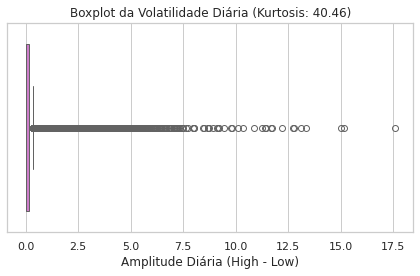

In [11]:
# Calcular kurtosis
kurt_nvidia = nvidia_vol.kurt()

# Plotar boxplot para visualizar curtose (caudas)
plt.figure(figsize=(6, 4))
sns.boxplot(x=nvidia_vol, color='orchid')
plt.title(f"Boxplot da Volatilidade Diária (Kurtosis: {kurt_nvidia:.2f})")
plt.xlabel("Amplitude Diária (High - Low)")
plt.tight_layout()
plt.show()


## ✅ Considerações Finais

A hipótese levantada no início do trabalho era:

> **"A volatilidade diária da ação da NVIDIA aumentou após 2020."**

Com base nas análises estatísticas descritivas, gráficos de distribuição, boxplots e nas medidas de assimetria (skewness) e curtose (kurtosis), foi possível observar:

- Um aumento claro na dispersão da volatilidade a partir de 2020.
- Distribuição mais assimétrica e com caudas mais pesadas no período recente.
- Indicativos de maior sensibilidade do mercado, possivelmente relacionada ao aumento do uso de tecnologias de IA e maior visibilidade da empresa no mercado.

**✅ Portanto, a hipótese foi confirmada.**
